In [69]:
#imports

from keras.layers.core import Dense, Activation , Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential 
import lstm, time #these are helper libraries
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
random.seed(120)

Date     datetime64[ns]
Close           float64
Days              int64
dtype: object 

        Date        Close  Days
0 2000-01-01  1455.219971     1
1 2000-01-02  1399.420044     2
2 2000-01-03  1402.109985     3
3 2000-01-04  1403.449951     4
4 2000-01-05  1441.469971     5 



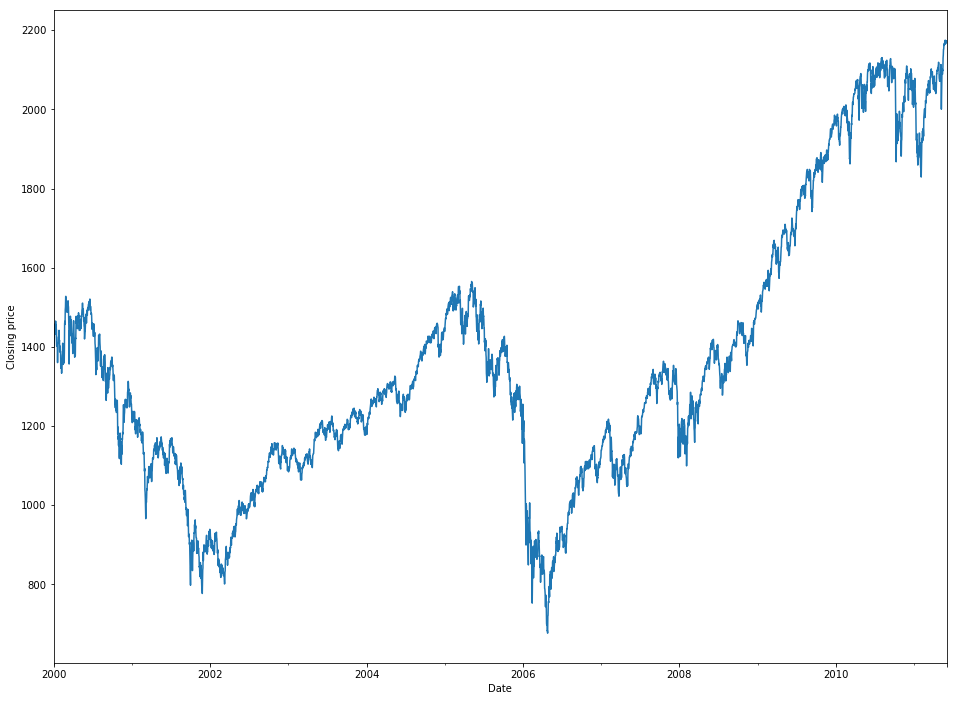

In [70]:
#visualizing dataset 
spy = pd.read_csv('sp500_modified.csv',parse_dates=['Date']) 
print spy.dtypes,'\n'  
print spy.head(),'\n'
spy.set_index('Date',inplace=True)  
spy['Close'].plot(figsize=(16, 12))
plt.ylabel('Closing price')
plt.show()



In [71]:
#step1: Load dataset

#here the data is normalized before it is loaded 

X_train,y_train,X_test,y_test  = lstm.load_data('sp500.csv',50,True)

In [73]:
#step2 : Building model
dropout = [0.2,0.3,0.4,0.5,0.6,0.7,0.8]

for i in range(len(dropout)):
    d = Dropout(dropout[i])
    model = Sequential()

    model.add(LSTM(input_dim = 1,output_dim = 50,return_sequences = True))

    model.add(d)


    model.add(LSTM(100,return_sequences = False))

    model.add(d)


    model.add(Dense(output_dim = 1))

    model.add(Activation('linear'))


    start = time.time()

    model.compile(loss = 'mse' , optimizer = 'rmsprop') #here optimizer is gradient descent named as rmsprop

    print '\n','compilation time for dropout = {} :'.format(dropout[i]),time.time() - start,'\n'
    
    #step3 : Training the model

    model.fit(X_train,y_train,batch_size = 512,nb_epoch = 1,validation_split = 0.05)


compilation time for dropout = 0.2 : 0.456846952438 

Train on 3523 samples, validate on 186 samples
Epoch 1/1
3523/3523 [==============================] - 22s - loss: 0.0027 - val_loss: 0.0017

compilation time for dropout = 0.3 : 0.0465090274811 

Train on 3523 samples, validate on 186 samples
Epoch 1/1
3523/3523 [==============================] - 17s - loss: 0.0029 - val_loss: 7.2514e-04

compilation time for dropout = 0.4 : 0.0255129337311 

Train on 3523 samples, validate on 186 samples
Epoch 1/1
3523/3523 [==============================] - 17s - loss: 0.0028 - val_loss: 0.0013

compilation time for dropout = 0.5 : 0.0265710353851 

Train on 3523 samples, validate on 186 samples
Epoch 1/1
3523/3523 [==============================] - 18s - loss: 0.0025 - val_loss: 7.4887e-04

compilation time for dropout = 0.6 : 0.0249998569489 

Train on 3523 samples, validate on 186 samples
Epoch 1/1
3523/3523 [==============================] - 17s - loss: 0.0027 - val_loss: 0.0014

compilation 

In [74]:
# As we can from the above results that dropout  = 0.5 is the optimal dropout value since it has the optimal 
#validation loss and loss

In [86]:
model = Sequential()

model.add(LSTM(input_dim = 1,output_dim = 50,return_sequences = True))

model.add(Dropout(0.5))


model.add(LSTM(100,return_sequences = False))

model.add(Dropout(0.5))


model.add(Dense(output_dim = 1))

model.add(Activation('linear'))


start = time.time()

model.compile(loss = 'mse' , optimizer = 'rmsprop') #here optimizer is gradient descent named as rmsprop

print '\n','compilation time for dropout = 0.5 :',time.time() - start,'\n'
    
#step3 : Training the model

model.fit(X_train,y_train,batch_size = 512,nb_epoch = 1,validation_split = 0.05)


compilation time for dropout = 0.5 : 0.0250558853149 

Train on 3523 samples, validate on 186 samples
Epoch 1/1
3523/3523 [==============================] - 63s - loss: 0.0029 - val_loss: 8.3550e-04


yo


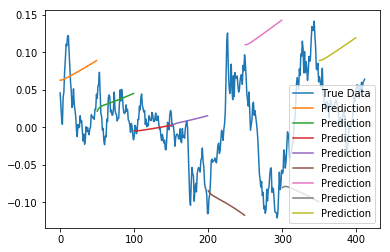

In [76]:
#step4 : predicting on test data and plotting the predictions

predictions = lstm.predict_sequences_multiple(model,X_test,50,50)
lstm.plot_results_multiple(predictions,y_test,50)

 Now let's use our model to predict the closing price 
for Sep-2016 prices,which it has never seen before

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
dtype: object 

        Date    Open    High     Low   Close   Volume
0 2017-04-07  827.96  828.48  820.51  824.67  1057253
1 2017-04-06  832.40  836.39  826.46  827.88  1254433 



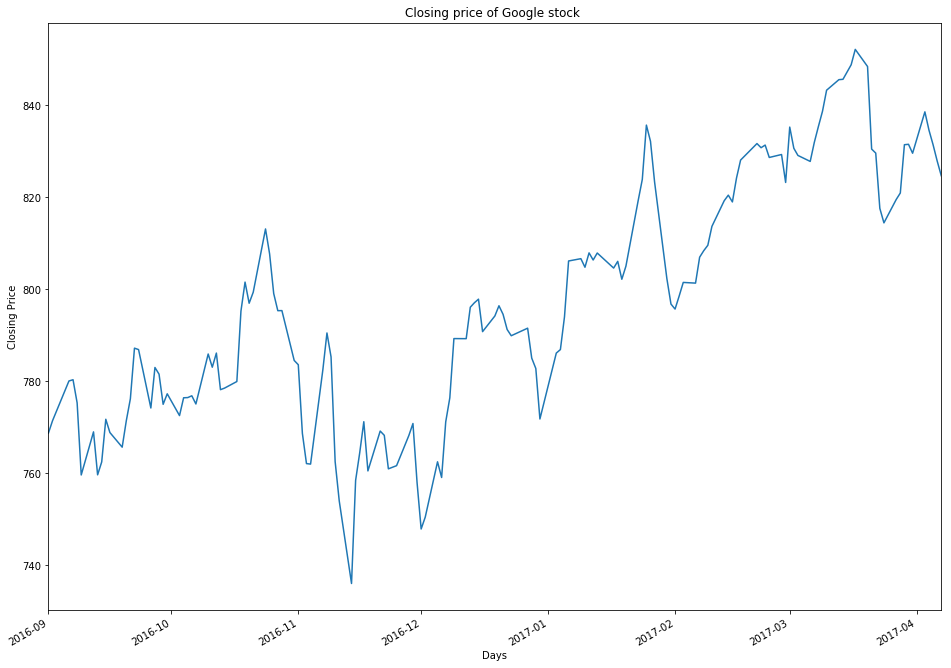

In [77]:
#loading the data 
new_data = pd.read_csv('goog.csv',parse_dates=['Date'])
print new_data.dtypes,'\n'
print new_data.head(2),'\n'
new_data.set_index('Date',inplace=True)
new_data['Close'].plot(figsize = (16,12))
plt.ylabel('Closing Price')
plt.xlabel('Days')
plt.title('Closing price of Google stock ')
plt.show()

In [78]:
#Descriptive statistics of this test data
print "Minimum price = {} \n".format(new_data.Close.min())
print "Maximum price = {} \n".format(new_data.Close.max())
print "Mean price = {} \n".format(new_data.Close.mean())
print "Standard deviation = {} \n".format(new_data.Close.std())

Minimum price = 736.08 

Maximum price = 852.12 

Mean price = 797.01807947 

Standard deviation = 26.4534629041 



yo


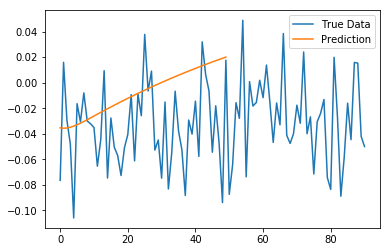

mse : 0.024246472725


In [88]:
X_test,y_test,_,_ = lstm.load_data('goog_m.csv',50,True)


#step4 : predicting on test data and plotting the predictions

predictions = lstm.predict_sequences_multiple(model,X_test,50,50)
lstm.plot_results_multiple(predictions,y_test,50)

print "mse : {}".format(np.mean(np.sqrt(np.square(X2 - y2))))

